In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

<Axes: >

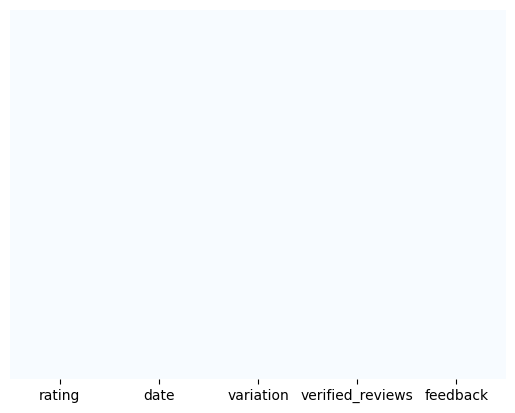

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

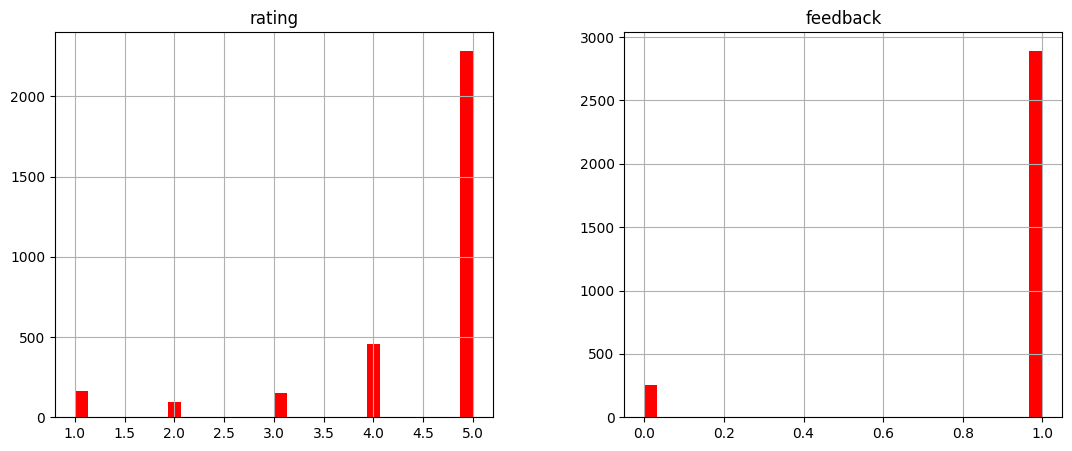

In [8]:
df.hist(bins = 30, figsize = (13,5), color = 'r')

In [9]:
df['length'] = df['verified_reviews'].fillna('').apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

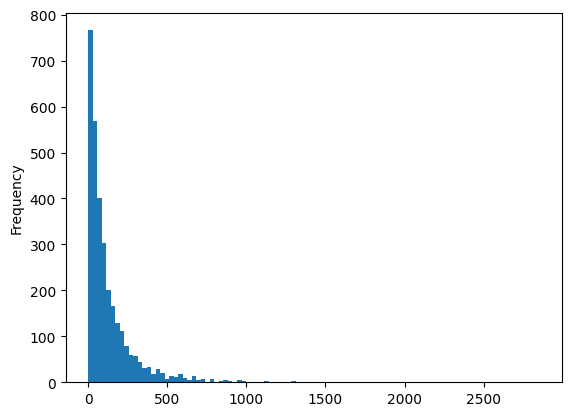

In [10]:
df['length'].plot(bins=100, kind='hist') 

In [11]:
# Let's see the longest message 43952
df[df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [12]:
# Let's see the shortest message 
df[df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [13]:
# Let's see the message with mean length 
df[df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [14]:
positive = df[df['feedback']==1]

In [15]:
negative = df[df['feedback']==0]

In [16]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [17]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [18]:
print(df['feedback'].value_counts())
print(df['feedback'].unique())

feedback
1    2893
0     257
Name: count, dtype: int64
[1 0]


In [19]:
print(df['rating'].value_counts())
print(df['rating'].unique())

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64
[5 4 3 2 1]


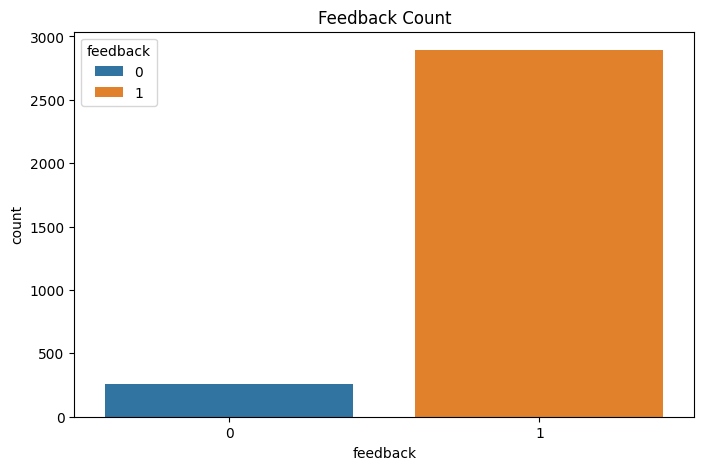

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='feedback', data=df, hue='feedback')
plt.title("Feedback Count")
plt.show()


<Axes: xlabel='rating', ylabel='count'>

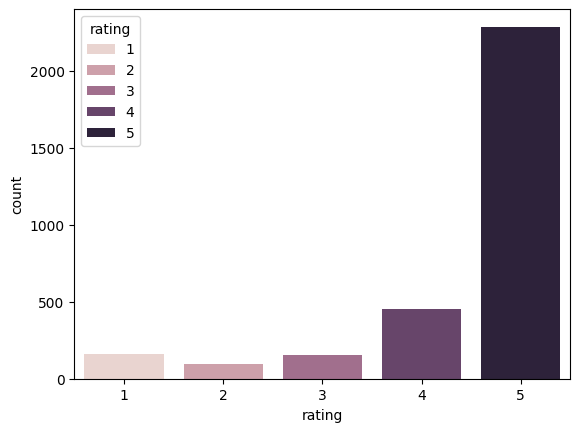

In [21]:
sns.countplot(x = 'rating', data = df, hue='rating')

<Axes: >

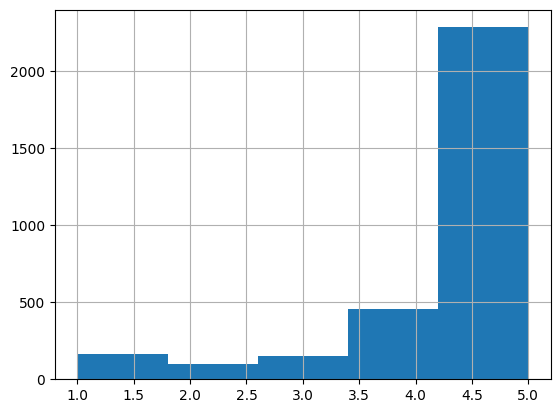

In [22]:
df['rating'].hist(bins = 5)

<Axes: xlabel='variation', ylabel='rating'>

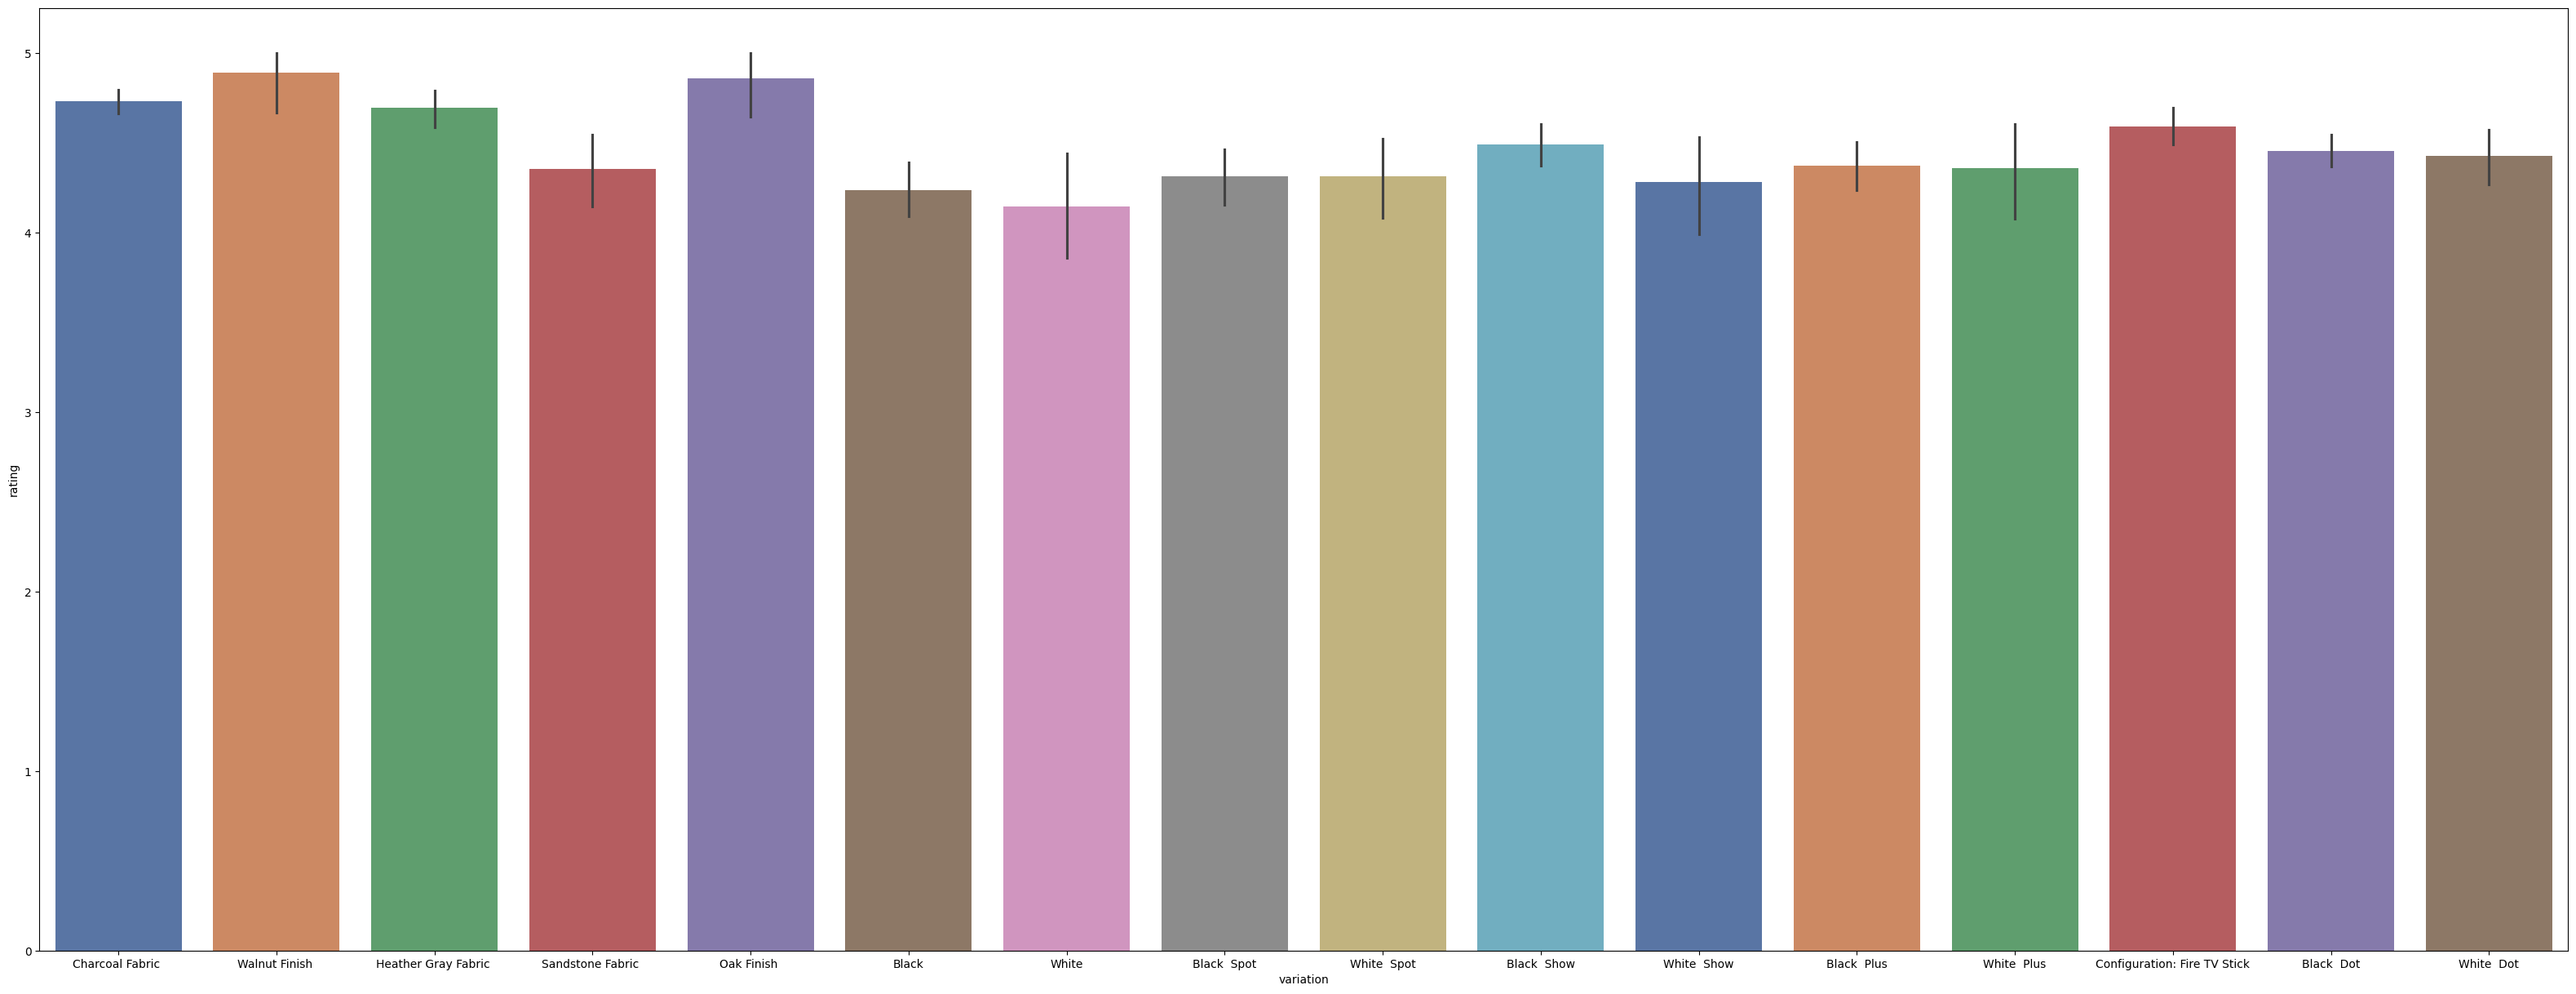

In [23]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data = df, palette = 'deep')

In [24]:
sentences = df['verified_reviews'].tolist()
len(sentences)

3150

In [25]:
print(sentences)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [26]:
sentences_as_one_string = " ".join(map(str, sentences))

In [27]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

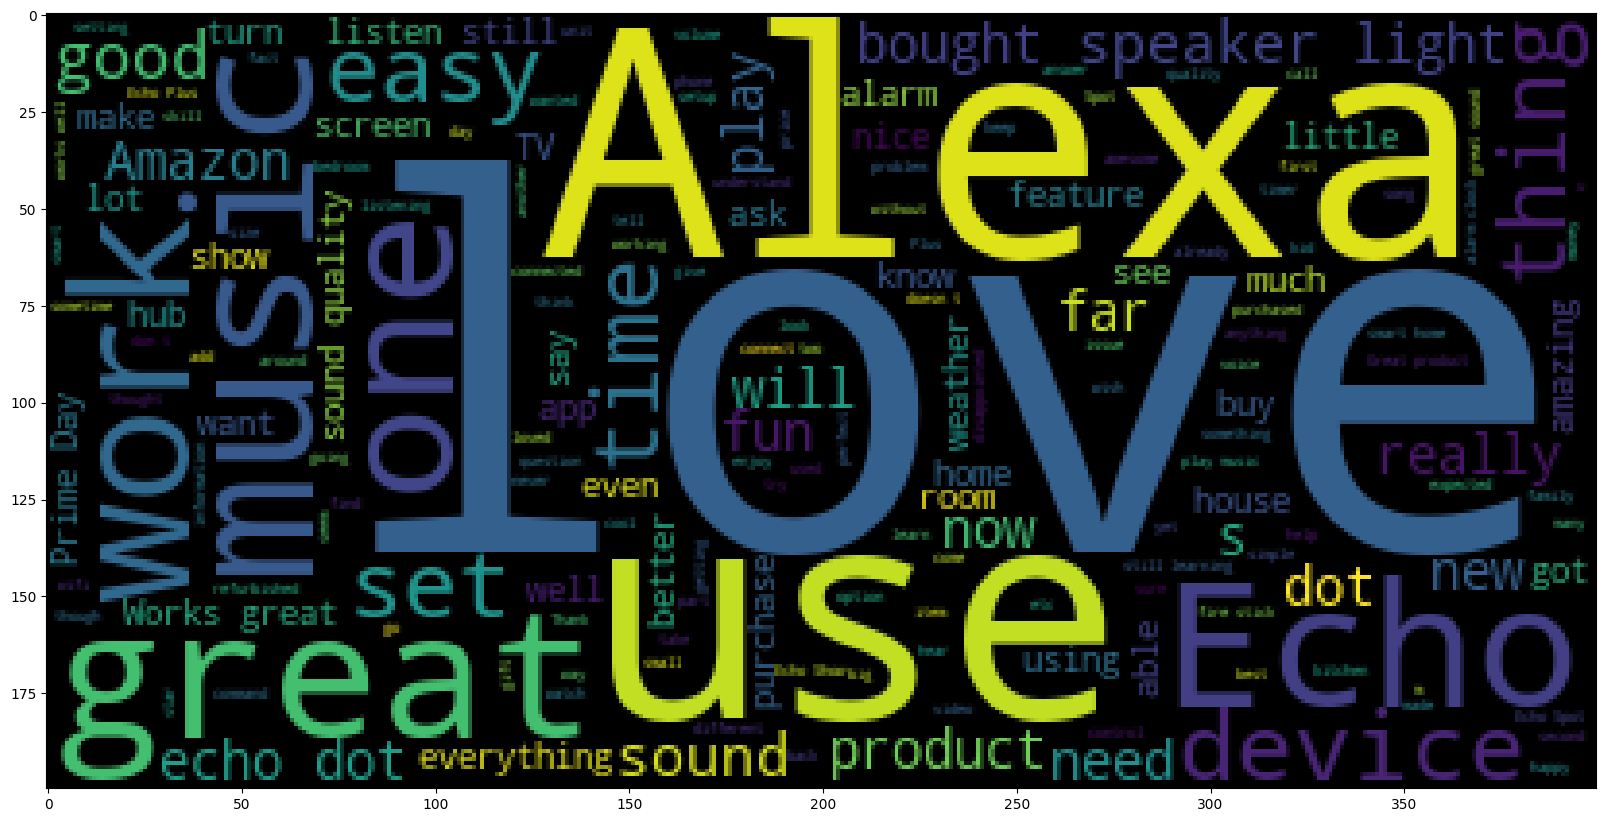

In [28]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [29]:
negative_list = negative['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [30]:
positive_list = negative['verified_reviews'].tolist()
positive_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [31]:
negative_sentences_as_one_string = " ".join(map(str, negative_list))

In [32]:
positive_sentences_as_one_string = " ".join(map(str, positive_list))

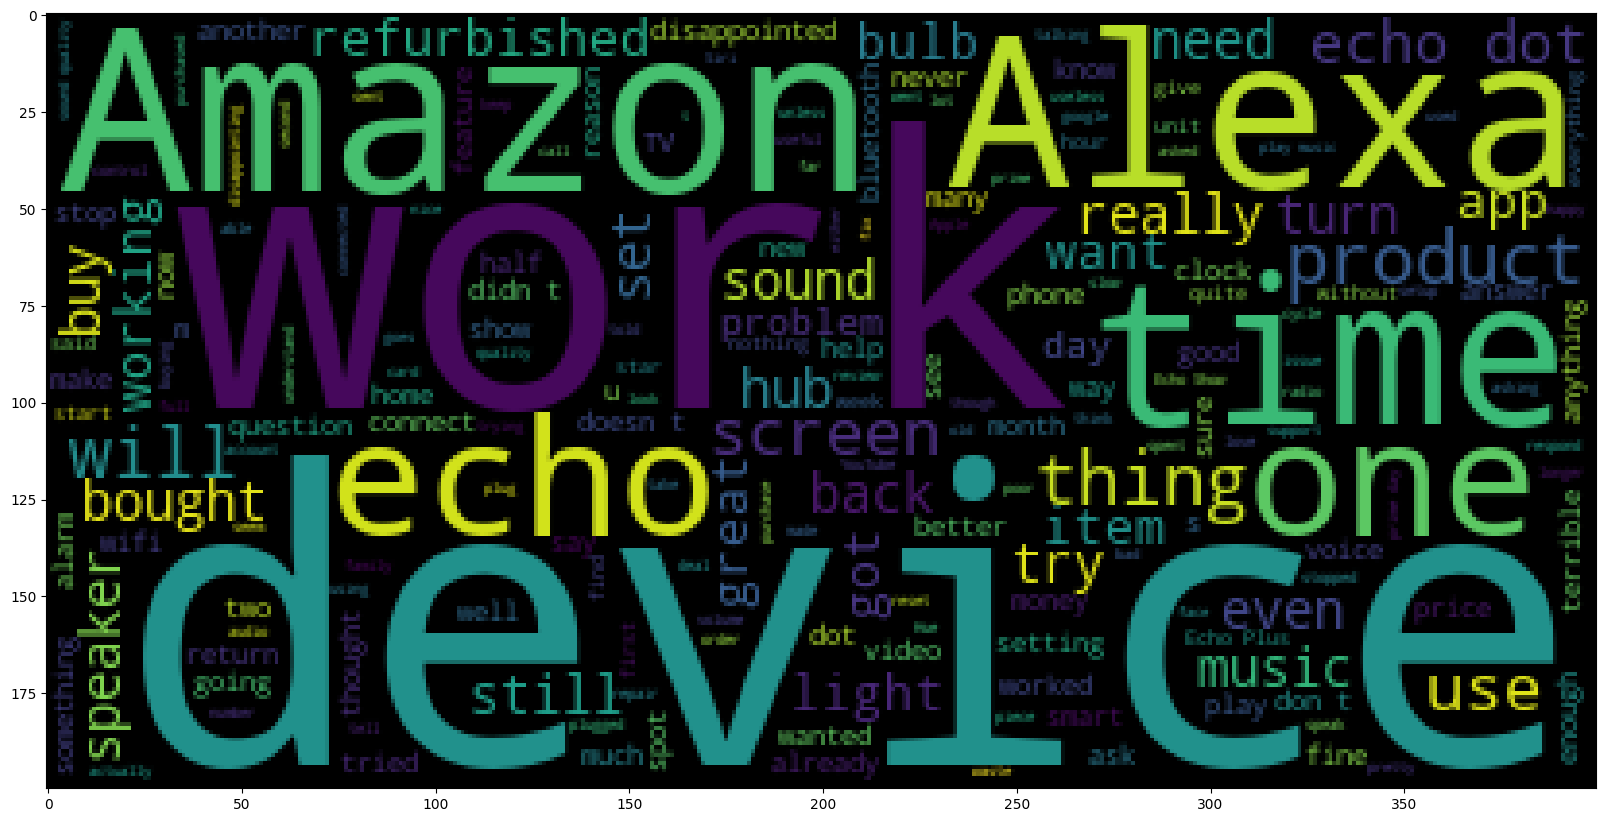

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

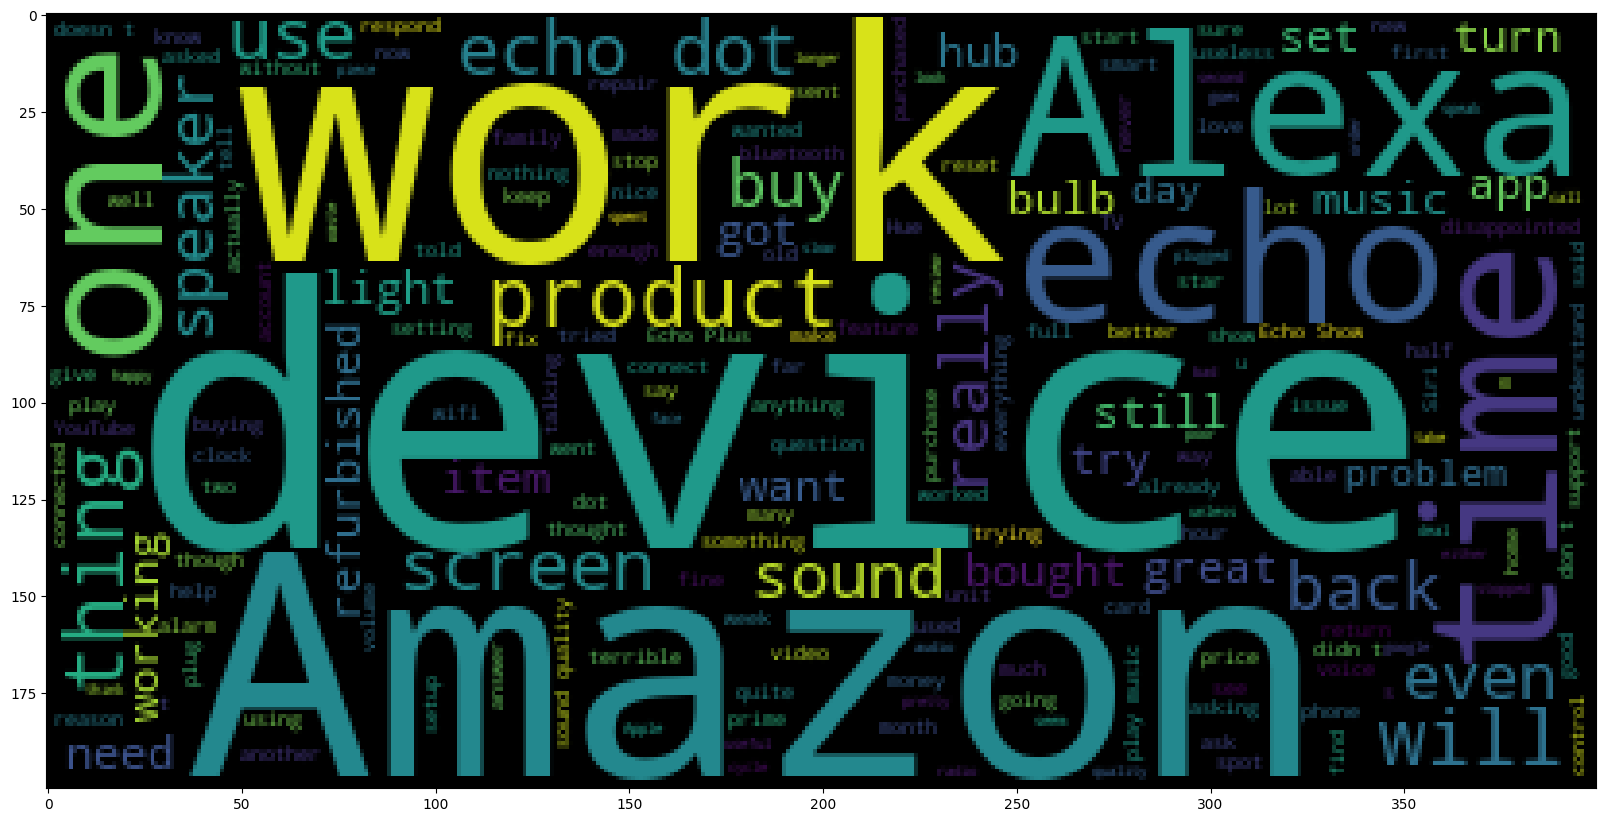

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))

In [35]:
# Let's drop the date
df = df.drop(['date', 'rating', 'length'],axis=1)

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

variation_encoded = encoder.fit_transform(df[['variation']])

variation_encoded_df = pd.DataFrame(variation_encoded, columns=encoder.get_feature_names_out(['variation']))

df_encoded = pd.concat([df, variation_encoded_df], axis=1)

In [37]:
df_encoded

,variation,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Charcoal Fabric,Love my Echo!,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Charcoal Fabric,Loved it!,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Charcoal Fabric,Music,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,Black Dot,"Listening to music, searching locations, check...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,Black Dot,"I do love these things, i have them running my...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,White Dot,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
df.drop(['variation'], axis=1)

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [39]:
df_encoded.drop(['variation'], axis=1, inplace=True)

In [40]:
df_encoded

,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [43]:
test_punc_removed = [char for char in test if char not in string.punctuation]
test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [44]:
# Join the characters again to form the string.
test_punc_removed_join = ''.join(test_punc_removed)
test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [45]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [48]:
test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [49]:
test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

In [50]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [51]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

In [52]:
challege

['H',
 'e',
 'r',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'm',
 'i',
 'n',
 'i',
 ' ',
 'c',
 'h',
 'a',
 'l',
 'l',
 'e',
 'n',
 'g',
 'e',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'w',
 'i',
 'l',
 'l',
 ' ',
 't',
 'e',
 'a',
 'c',
 'h',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 's',
 't',
 'o',
 'p',
 'w',
 'o',
 'r',
 'd',
 's',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [54]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [55]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [56]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [57]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

In [58]:
# Let's test the newly added function
df_clean = df_encoded['verified_reviews'].dropna().apply(message_cleaning)

In [59]:
print(df_clean[3]) # show the cleaned up version

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [60]:
print(df_encoded['verified_reviews'][3]) # show the original version

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [61]:
df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3149, dtype: object

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
df_encoded['verified_reviews'] = df_encoded['verified_reviews'].fillna('')
vectorizer = CountVectorizer(analyzer=message_cleaning)
df_countvectorizer = vectorizer.fit_transform(df_encoded['verified_reviews'])


In [63]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [64]:
print(df_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
df_countvectorizer.shape

(3150, 5211)

In [66]:
df_encoded

,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
# first let's drop the column
df_encoded.drop(['verified_reviews'], axis=1, inplace=True)
dfs = pd.DataFrame(df_countvectorizer.toarray())


In [68]:
# Now let's concatenate them together
reviews_df = pd.concat([df_encoded, dfs], axis=1)


In [69]:
reviews_df

,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Let's drop the target label coloumns
X = reviews_df.drop(['feedback'],axis=1)


In [71]:
X

,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y = reviews_df['feedback']

In [73]:
X.shape

(3150, 5226)

In [74]:
y.shape

(3150,)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
from sklearn.naive_bayes import MultinomialNB

X_train.columns = X_train.columns.astype(str)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

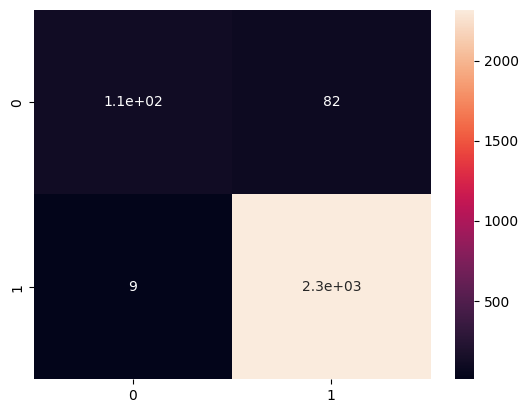

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

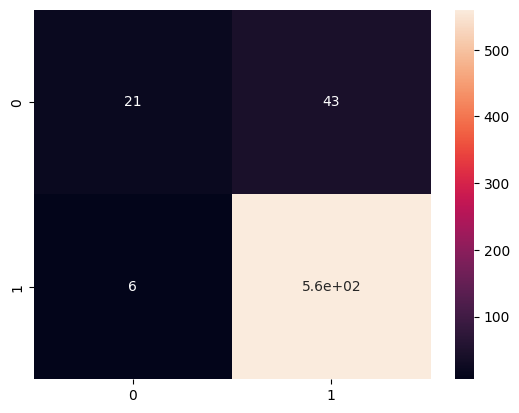

In [78]:
# Predicting the Test set results
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

sns.heatmap(cm, annot=True)

In [79]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.33      0.46        64
           1       0.93      0.99      0.96       566

    accuracy                           0.92       630
   macro avg       0.85      0.66      0.71       630
weighted avg       0.91      0.92      0.91       630



In [80]:
### Apply multiple model in classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [81]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    try:
        print(f"Training model: {name}")
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training set performance
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
        model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
        model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
        
        print(f"Model: {name}")
        print(f"Train Accuracy: {model_train_accuracy:.4f} | Test Accuracy: {model_test_accuracy:.4f}")
        print(f"Train F1-score: {model_train_f1:.4f} | Test F1-score: {model_test_f1:.4f}")
        print(f"Train Precision: {model_train_precision:.4f} | Test Precision: {model_test_precision:.4f}")
        print(f"Train Recall: {model_train_recall:.4f} | Test Recall: {model_test_recall:.4f}")
        print(f"Train ROC-AUC: {model_train_rocauc_score:.4f} | Test ROC-AUC: {model_test_rocauc_score:.4f}")
        print("=" * 50)

    except Exception as e:
        print(f"Model {name} error: {e}")
        print("-" * 50)

Training model: Logistic Regression
Model: Logistic Regression
Train Accuracy: 0.9802 | Test Accuracy: 0.9222
Train F1-score: 0.9788 | Test F1-score: 0.9098
Train Precision: 0.9806 | Test Precision: 0.9123
Train Recall: 0.9802 | Test Recall: 0.9222
Train ROC-AUC: 0.8705 | Test ROC-AUC: 0.6726
Training model: Random Forest
Model: Random Forest
Train Accuracy: 0.9940 | Test Accuracy: 0.9238
Train F1-score: 0.9940 | Test F1-score: 0.9066
Train Precision: 0.9940 | Test Precision: 0.9197
Train Recall: 0.9940 | Test Recall: 0.9238
Train ROC-AUC: 0.9635 | Test ROC-AUC: 0.6458
Training model: Gradient Boosting
Model: Gradient Boosting
Train Accuracy: 0.9536 | Test Accuracy: 0.9063
Train F1-score: 0.9440 | Test F1-score: 0.8754
Train Precision: 0.9558 | Test Precision: 0.8910
Train Recall: 0.9536 | Test Recall: 0.9063
Train ROC-AUC: 0.6969 | Test ROC-AUC: 0.5598
Training model: SVM
Model: SVM
Train Accuracy: 0.9639 | Test Accuracy: 0.9048
Train F1-score: 0.9587 | Test F1-score: 0.8651
Train Pre

In [82]:
## Hyperparameter Training

# Random Forest
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Logistic Regression
lr_params = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

# Support Vector Machine (SVC)
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

# K-Nearest Neighbors (KNN)
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [83]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("LogisticRegression", LogisticRegression(), lr_params),
    ("SVM", SVC(), svc_params),
    ("KNN", KNeighborsClassifier(), knn_params),
]

In [84]:
randomcv_models

[('RandomForest',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500],
   'max_depth': [5, 10, None],
   'min_samples_split': [2, 5, 10],
   'criterion': ['gini', 'entropy']}),
 ('LogisticRegression',
  LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': [0.1, 1, 10],
   'solver': ['liblinear', 'lbfgs']}),
 ('SVM',
  SVC(),
  {'C': [0.1, 1, 10],
   'kernel': ['linear', 'rbf', 'poly'],
   'gamma': ['scale', 'auto']}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan']})]

In [85]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
---------------- Best Params for RandomForest -------------------
{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': None, 'criterion': 'gini'}
---------------- Best Params for LogisticRegression -------------------
{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
---------------- Best Params for SVM -------------------
{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}


In [86]:
# Dictionary of models with best parameters from RandomizedSearchCV
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2,
                                            max_depth=None, criterion='gini'),

    "Logistic Regression": LogisticRegression(solver='lbfgs', penalty='l2',
                                              C=10, max_iter=1000),

    "SVM": SVC(kernel='rbf', gamma='scale', C=10, probability=True),

    "KNN": KNeighborsClassifier(weights='distance', n_neighbors=9, metric='manhattan')
}

# Iterate through models and evaluate performance
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...\n")

    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get Probabilities for ROC-AUC (only for models supporting predict_proba)
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    
     # Display Results
    print(f"🔹 {model_name} Performance:")
    print("\n📌 Training Set:")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 Score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- ROC AUC Score: {model_train_rocauc_score:.4f}" if model_train_rocauc_score is not None else "- ROC AUC Score: Not Available")

    print("\n📌 Test Set:")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 Score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- ROC AUC Score: {model_test_rocauc_score:.4f}" if model_test_rocauc_score is not None else "- ROC AUC Score: Not Available")

    print("=" * 50, "\n")


🔍 Training Random Forest...

🔹 Random Forest Performance:

📌 Training Set:
- Accuracy: 0.9940
- F1 Score: 0.9940
- Precision: 0.9940
- Recall: 0.9940
- ROC AUC Score: 0.9990

📌 Test Set:
- Accuracy: 0.9222
- F1 Score: 0.9040
- Precision: 0.9176
- Recall: 0.9222
- ROC AUC Score: 0.9153


🔍 Training Logistic Regression...

🔹 Logistic Regression Performance:

📌 Training Set:
- Accuracy: 0.9937
- F1 Score: 0.9935
- Precision: 0.9937
- Recall: 0.9937
- ROC AUC Score: 0.9990

📌 Test Set:
- Accuracy: 0.9286
- F1 Score: 0.9243
- Precision: 0.9225
- Recall: 0.9286
- ROC AUC Score: 0.9106


🔍 Training SVM...

🔹 SVM Performance:

📌 Training Set:
- Accuracy: 0.9933
- F1 Score: 0.9931
- Precision: 0.9933
- Recall: 0.9933
- ROC AUC Score: 0.9843

📌 Test Set:
- Accuracy: 0.9175
- F1 Score: 0.9001
- Precision: 0.9064
- Recall: 0.9175
- ROC AUC Score: 0.9257


🔍 Training KNN...

🔹 KNN Performance:

📌 Training Set:
- Accuracy: 0.9940
- F1 Score: 0.9940
- Precision: 0.9940
- Recall: 0.9940
- ROC AUC Sco

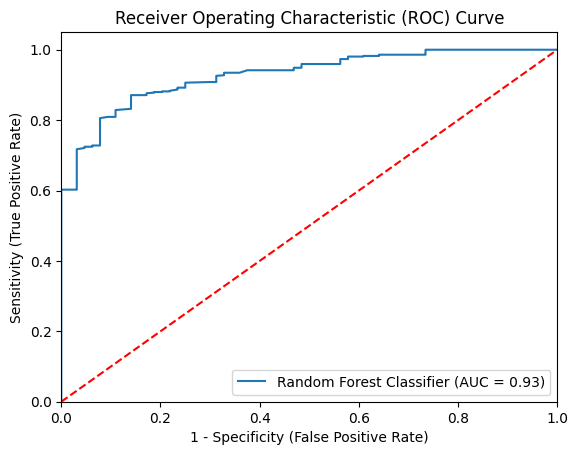

In [87]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=200,min_samples_split=2,
                                          max_features=8,max_depth=None, criterion='entropy'),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_rf.png")
plt.show()

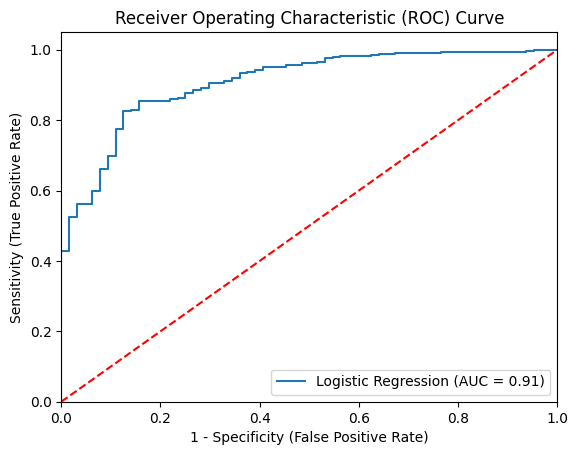

In [88]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Logistic Regression',
    'model':  LogisticRegression(solver='liblinear', penalty='l2',
                                              C=0.1, max_iter=1000),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_lr.png")
plt.show()
     


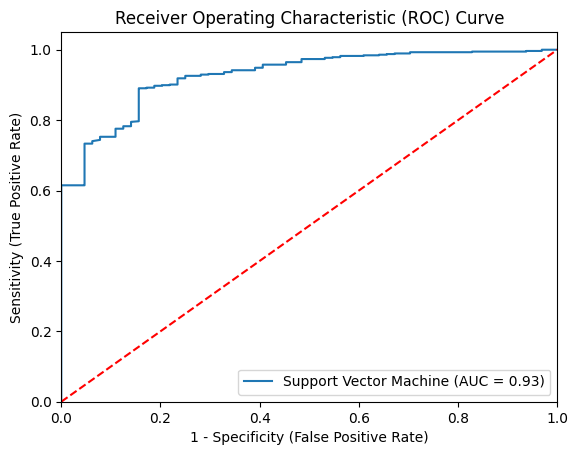

In [89]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Support Vector Machine',
    'model':  SVC(kernel='linear', gamma='scale', C=0.1, probability=True),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_svc.png")
plt.show()

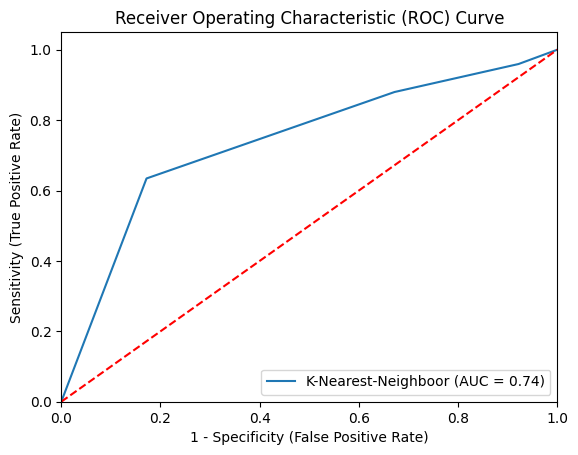

In [90]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'K-Nearest-Neighboor',
    'model':  KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='manhattan'),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model']  # Get model
    model.fit(X_train, y_train)  # Train model
    
    # Get prediction probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc:.2f})")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save and show plot
plt.savefig("auc_knn.png")
plt.show()

In [91]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_train_2d_pca = pca.fit_transform(X_train)
X_test_2d_pca = pca.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

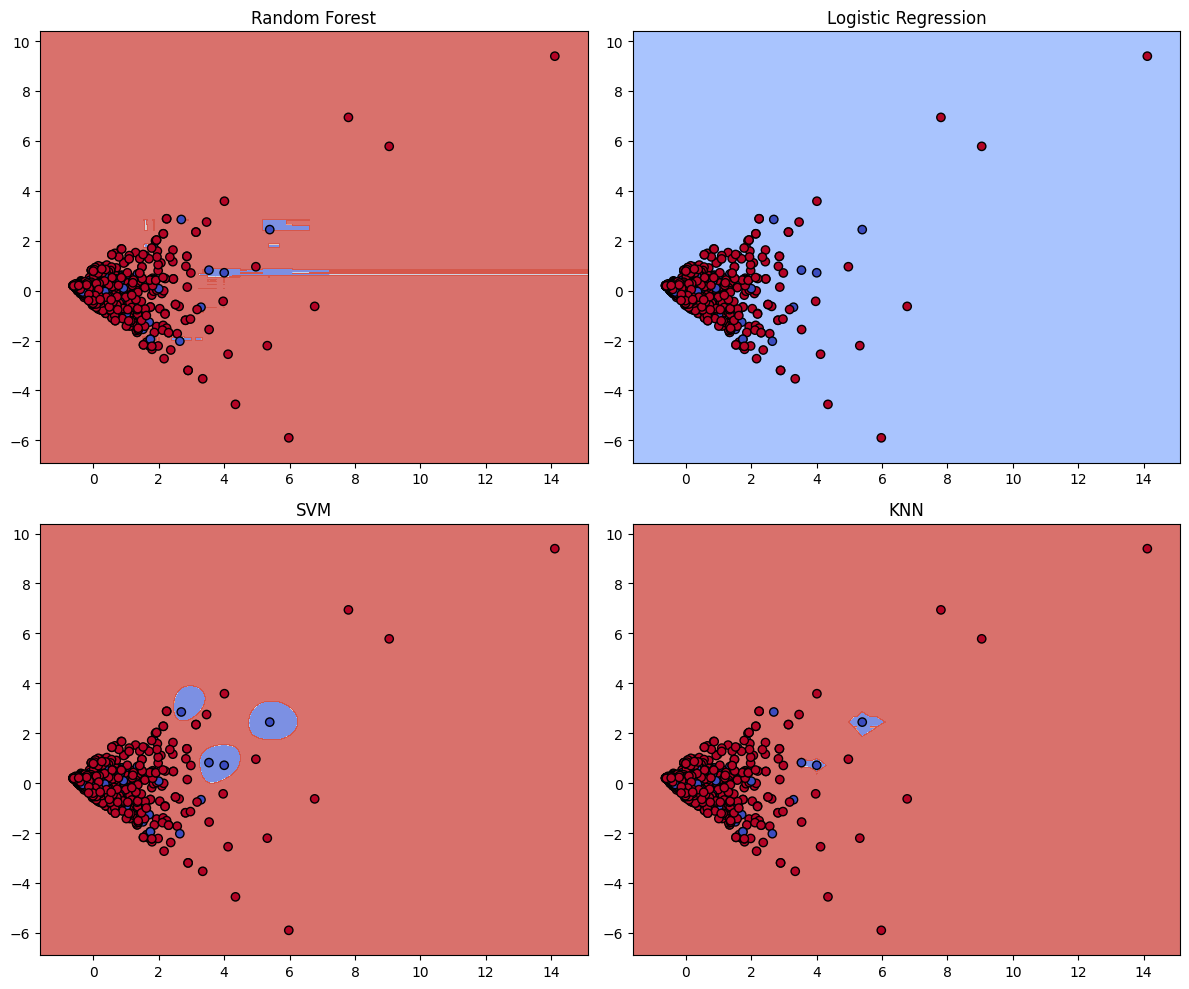

In [92]:
X1, X2 = np.meshgrid(np.arange(start=X_train_2d_pca[:, 0].min() - 1, 
                             stop=X_train_2d_pca[:, 0].max() + 1, 
                             step=0.01),
                     np.arange(start=X_train_2d_pca[:, 1].min() - 1, 
                             stop=X_train_2d_pca[:, 1].max() + 1, 
                             step=0.01))

# Plot Decision Boundaries for Each Model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_2d_pca, y_train)

    # Predict on Meshgrid
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # Plot decision boundary
    axes[idx].contourf(X1, X2, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot training points
    scatter = axes[idx].scatter(X_train_2d_pca[:, 0], X_train_2d_pca[:, 1], 
                               c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

    axes[idx].set_title(model_name)  # Title for each subplot

plt.tight_layout()
plt.show()

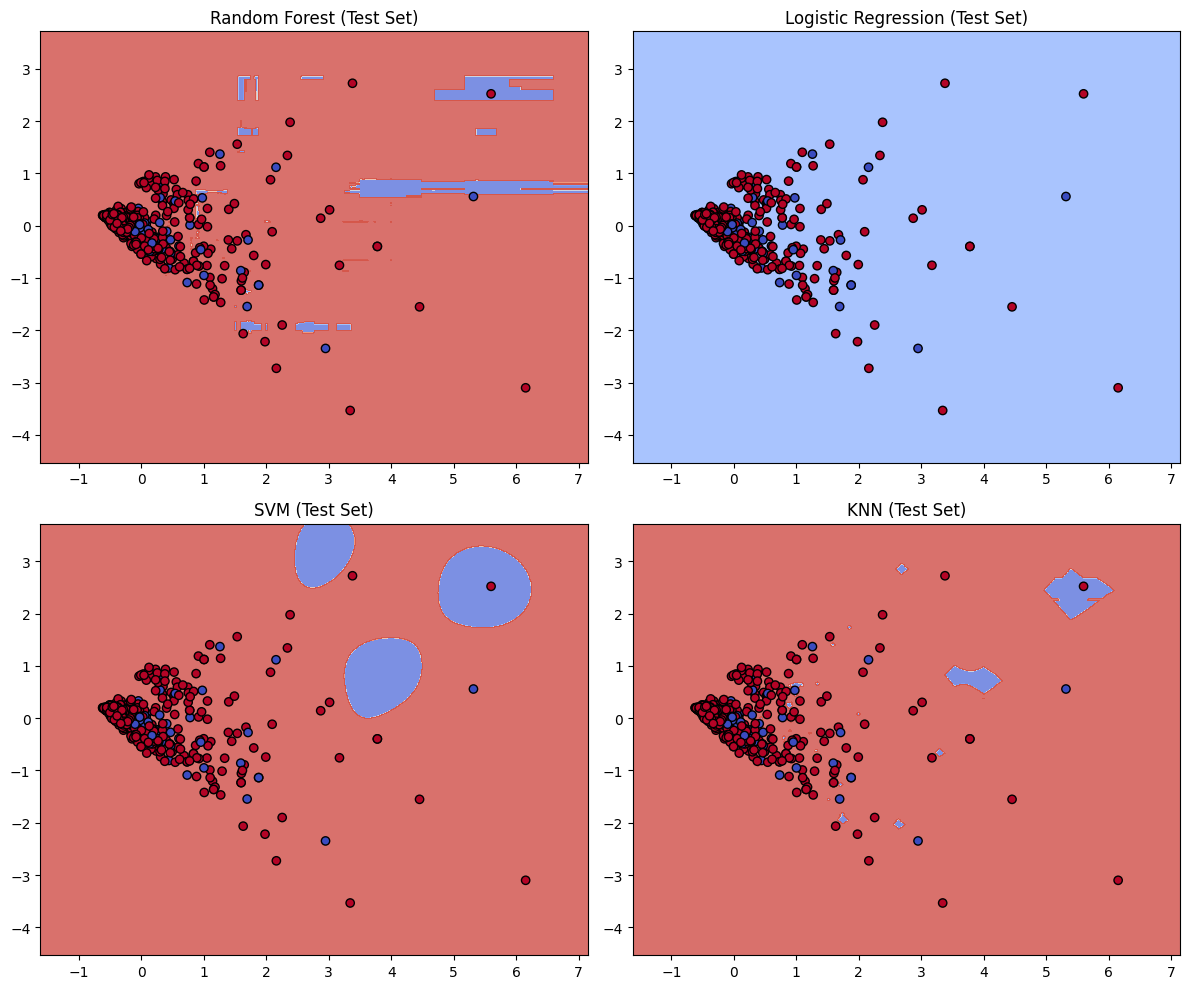

In [93]:
X1, X2 = np.meshgrid(np.arange(start=X_test_2d_pca[:, 0].min() - 1, 
                     stop=X_test_2d_pca[:, 0].max() + 1, 
                     step=0.01),
                 np.arange(start=X_test_2d_pca[:, 1].min() - 1, 
                     stop=X_test_2d_pca[:, 1].max() + 1, 
                     step=0.01))

# Plot Decision Boundaries for Each Model on Test Set
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_2d_pca, y_train)  # Changed to _pca version

    # Predict on Meshgrid using Test Set
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # Plot decision boundary
    axes[idx].contourf(X1, X2, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot test points instead of training points
    scatter = axes[idx].scatter(X_test_2d_pca[:, 0], X_test_2d_pca[:, 1], 
                               c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')

    axes[idx].set_title(f"{model_name} (Test Set)")  # Update title

plt.tight_layout()
plt.show()

In [94]:
from sklearn.random_projection import SparseRandomProjection
import numpy as np

srp = SparseRandomProjection(n_components=2, random_state=42)

X_train_2d_srp = srp.fit_transform(X_train)
X_test_2d_srp = srp.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

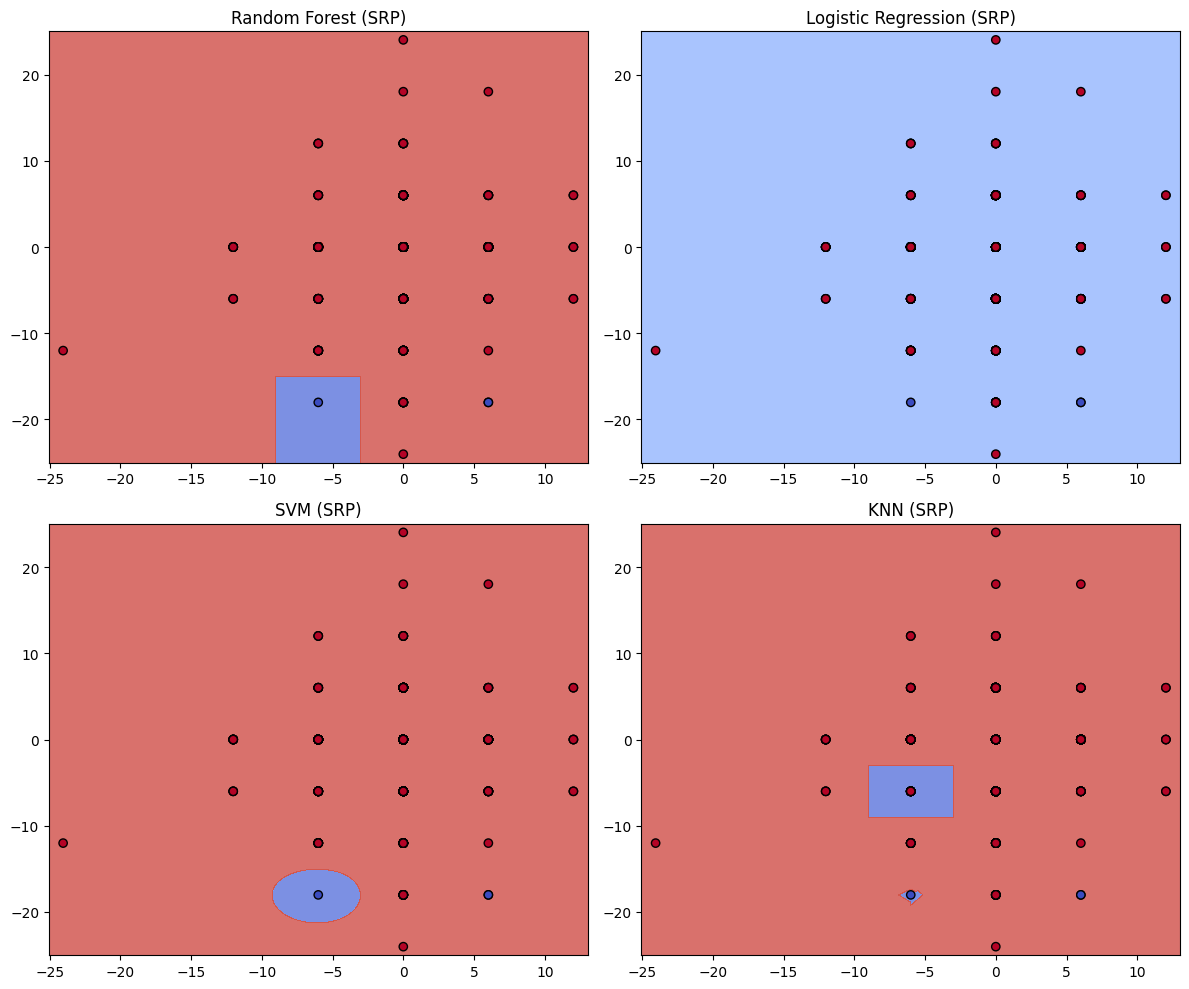

In [95]:
X1, X2 = np.meshgrid(np.arange(start=X_train_2d_srp[:, 0].min() - 1, 
                             stop=X_train_2d_srp[:, 0].max() + 1, 
                             step=0.01),
                     np.arange(start=X_train_2d_srp[:, 1].min() - 1, 
                             stop=X_train_2d_srp[:, 1].max() + 1, 
                             step=0.01))

# Plot Decision Boundaries for Each Model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_2d_srp, y_train)  # Using SRP transformed data

    # Predict on Meshgrid
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # Plot decision boundary
    axes[idx].contourf(X1, X2, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot training points
    scatter = axes[idx].scatter(X_train_2d_srp[:, 0], X_train_2d_srp[:, 1], 
                               c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

    axes[idx].set_title(f"{model_name} (SRP)")  # Updated title to indicate SRP

plt.tight_layout()
plt.show()

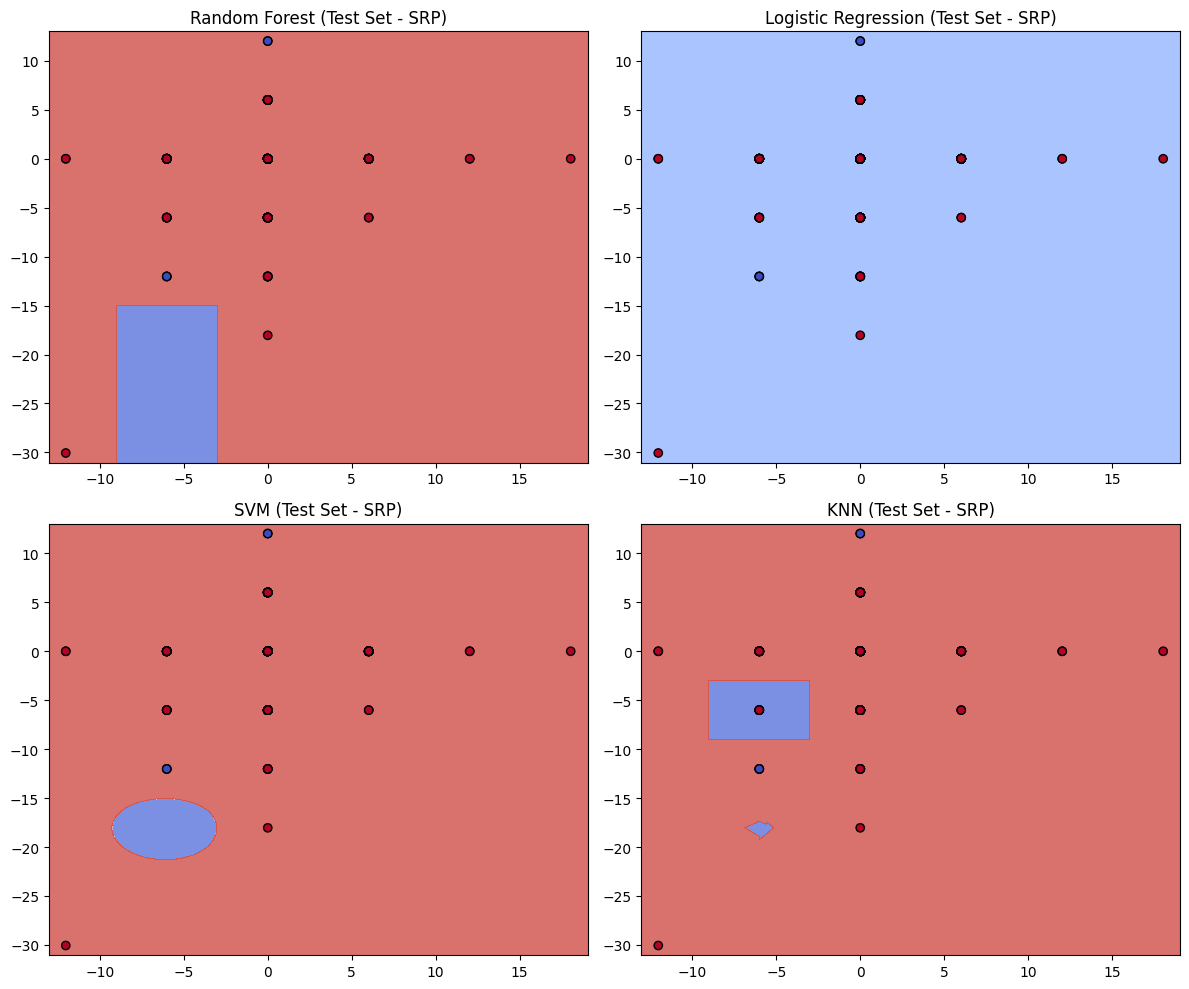

In [96]:
X1, X2 = np.meshgrid(np.arange(start=X_test_2d_srp[:, 0].min() - 1, 
                     stop=X_test_2d_srp[:, 0].max() + 1, 
                     step=0.01),
                 np.arange(start=X_test_2d_srp[:, 1].min() - 1, 
                     stop=X_test_2d_srp[:, 1].max() + 1, 
                     step=0.01))

# Plot Decision Boundaries for Each Model on Test Set
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_2d_srp, y_train)  # Using SRP transformed training data

    # Predict on Meshgrid using Test Set
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # Plot decision boundary
    axes[idx].contourf(X1, X2, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot test points instead of training points
    scatter = axes[idx].scatter(X_test_2d_srp[:, 0], X_test_2d_srp[:, 1], 
                               c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')

    axes[idx].set_title(f"{model_name} (Test Set - SRP)")  # Updated title to indicate SRP

plt.tight_layout()
plt.show()